In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement")

In [3]:
from sklearn.externals import joblib
from modeling.gridsearch import GridSearch

path = "D:\\Dropbox\\My work\\krypl-project\\models\\01-priceMovement"
grid_search = load_model(f'{path}\\tree_search.pkl')

# Prediction on validation set

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

confusion_matrixes = []
precisions = []
recalls = []
for clf in grid_search.clfs:
    y_pred = clf.predict(X_val)
    confusion_matrixes.append(confusion_matrix(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))

# Precision - recall

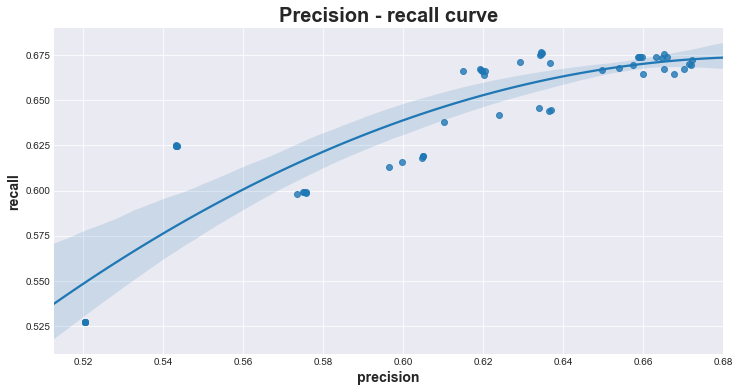

In [5]:
plt.figure(figsize=[12, 6])
sns.regplot(np.array(precisions), np.array(recalls), order=2)
plt.title('Precision - recall curve', fontproperties=title_font)
plt.xlabel('precision', fontproperties=axis_font)
plt.ylabel('recall', fontproperties=axis_font);

# ROC curve

In [6]:
def cm_parts(conf_mat):
    TN = conf_mat[0, 0]
    FN = conf_mat[1, 0]
    FP = conf_mat[0, 1]
    TP = conf_mat[1, 1]
    return TN, FN, FP, TP


def fpr(conf_mat):
    TN, FN, FP, TP = cm_parts(conf_mat)
    return FP / (FP + TN)

# TN = 1, FN = 2, FP = 3, TP = 4
y = [0, 0,  0, 1, 1, 1, 1, 1, 1, 1]
y_true = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
conf_mat = confusion_matrix(y_true, y)
np.testing.assert_array_equal(conf_mat, np.array([[1, 3], 
                                                  [2, 4]]))
TN, FN, FP, TP = cm_parts(conf_mat)
assert TN == 1
assert FN == 2
assert FP == 3
assert TP == 4

assert fpr(conf_mat) == (3 / (3+1))

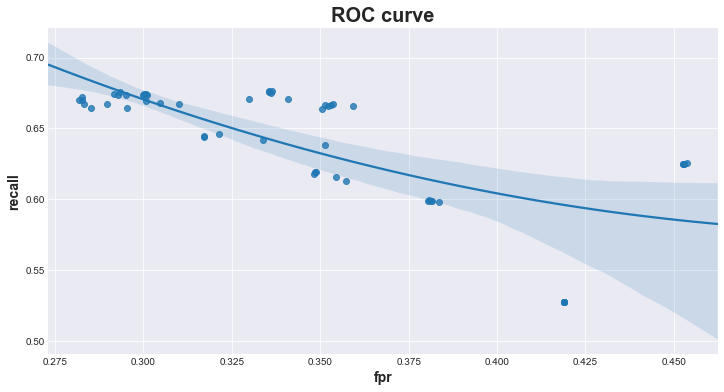

In [7]:
fprs = [fpr(conf_mat) for conf_mat in confusion_matrixes]
plt.figure(figsize=[12, 6])
sns.regplot(np.array(fprs), np.array(recalls), order=2)
plt.title('ROC curve', fontproperties=title_font)
plt.xlabel('fpr', fontproperties=axis_font)
plt.ylabel('recall', fontproperties=axis_font);

# Select model

In [8]:
stats = pd.DataFrame({
        'precision': precisions,
        'recall': recalls,
        'fpr': fprs
    })

stats.sort_values('precision', ascending=False)

,precision,recall,fpr
45,0.6721,0.6721,0.2827
40,0.6720,0.6697,0.2818
35,0.6715,0.6703,0.2827
50,0.6701,0.6673,0.2832
30,0.6677,0.6646,0.2851
41,0.6658,0.6742,0.2917
31,0.6651,0.6672,0.2896
46,0.6651,0.6755,0.2932
36,0.6646,0.6736,0.2929
51,0.6631,0.6738,0.2950


In [10]:
clf = grid_search.clfs[45]

# Features importance

In [11]:
features = X_val.columns
importances = clf.feature_importances_
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df.sort_values('importance', ascending=False)

,feature,importance
17,ac288,0.0875
20,vol2016,0.0868
10,pma2016,0.0712
22,dv_288_2016,0.0617
19,vol288,0.0583
21,dv_36_288,0.0550
16,ac36,0.0539
15,ma_36_288,0.0513
8,pma36,0.0509
9,pma288,0.0476


In [12]:
features

Index(['return', 'return_1', 'return_2', 'zscore_36_return',
       'zscore_288_return', 'zscore_36_volume', 'zscore_288_volume',
       'zscore_2016_volume', 'pma36', 'pma288', 'pma2016', 'vma36', 'vma288',
       'vma2016', 'ma_12_108', 'ma_36_288', 'ac36', 'ac288', 'vol36', 'vol288',
       'vol2016', 'dv_36_288', 'dv_288_2016'],
      dtype='object')

# Evaluation on test set

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

def cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns=['predicted_0', 'predicted_1'], index=['true_0', 'true_1'])
    return cm


def eval(clf, X, y_true):
    y_pred = clf.predict(X)
    report = classification_report(y_true, y_pred)
    conf_matrix = cm(y_true, y_pred)
    print(conf_matrix, end='\n\n')
    print(f'Precison: %.3f' % precision_score(y_true, y_pred))
    print(f'Recall: %.3f' % recall_score(y_true, y_pred))
    print(f'FPR: %.3f' % fpr(conf_matrix.values))

In [14]:
eval(clf, X_val, y_val)

        predicted_0  predicted_1
true_0        12045         4747
true_1         4746         9728

Precison: 0.672
Recall: 0.672
FPR: 0.283


In [15]:
eval(clf, X_test, y_test)

        predicted_0  predicted_1
true_0        18264         6951
true_1         7082        14368

Precison: 0.674
Recall: 0.670
FPR: 0.276


In [16]:
save_model(clf, f'{path}\\tree_selected_01.pkl');